In [1]:
import pathlib

import arviz as az
from couplings import metropolis_hastings
from couplings.utils import plot_coupled_chains, mixture_of_gaussians
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

image_dir = pathlib.Path("..", "static", "img").resolve()
assert image_dir.exists()

In [2]:
plt.style.use('tufte')

In [3]:
def plot_bias(data, log_pdf=None):
    fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
    xmin, xmax= data.x.min(), data.x.max()
    x = np.linspace(xmin, xmax, 500)
    for idx, row in enumerate(data.x[1:]):
        y, *_ = az.plots.kdeplot._fast_kde(row, xmin=xmin, xmax=xmax)
        y_base = -idx
        positive = np.nonzero(y)
        y = 50 * y + y_base
        ax.plot(x, y, 'k-', lw=0.5)
        ax.fill_between(x[positive], y_base, y[positive], color='skyblue', alpha=0.2)
    if log_pdf is not None:
        ax.plot(x, y_base + y, 'k-', lw=0.5)
    for spine in ax.spines.values():
        spine.set_visible(False)
    yticks = np.arange(0, -75, 5, dtype=int)
    ax.set_yticks([])
    ax.set_ylabel("$\leftarrow$ Iteration")
    ax.set_xticks([])
    ax.set_title(f"$\pi_n(x)$ for first {len(data.x)} iterations")
    return fig, ax

In [4]:
chains = 5_000
rv = mixture_of_gaussians(((3, 1), (-3, 1)), (0.5, 0.5))
log_prob = rv.logpdf

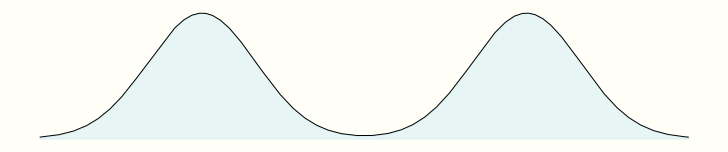

In [5]:
x = np.linspace(-6, 6, 500)
fig, ax = plt.subplots(figsize=(10, 2), constrained_layout=True)
ax.plot(x, np.exp(log_prob(x)), 'k-', lw=1)
ax.fill_between(x, 0, np.exp(log_prob(x)), color='skyblue', alpha=0.2)
ax.axis('off')
fig.savefig(image_dir / 'base_dist.png', transparent=True)

In [6]:
np.random.seed(0)
data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=1.5,
        init_x=0,
        init_y=0,
        lag=50, 
        iters=75, 
        chains=chains)

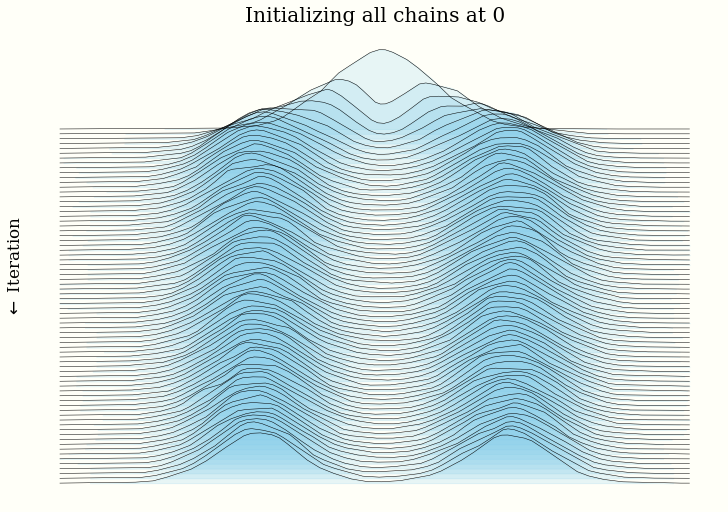

In [7]:
fig, ax = plot_bias(data)
ax.set_title("Initializing all chains at 0")
fig.savefig(image_dir / 'init_0.png', transparent=True)

In [8]:
np.random.seed(0)
data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=1.5,
        init_x=3,
        init_y=0,
        lag=50, 
        iters=75, 
        chains=chains)

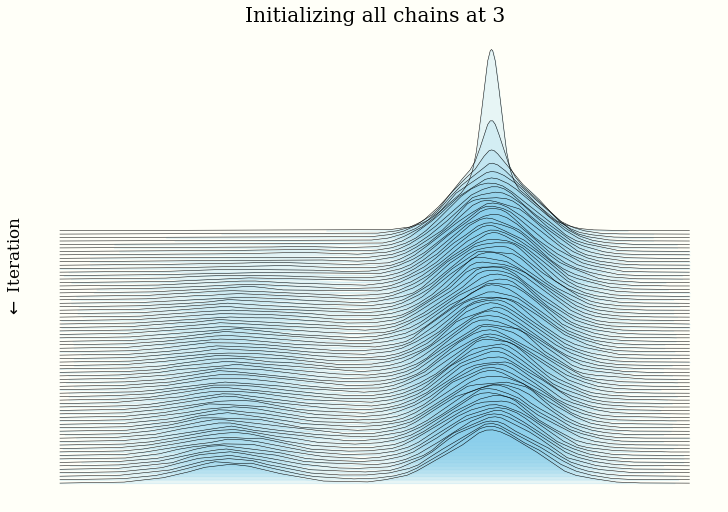

In [9]:
fig, ax = plot_bias(data)
ax.set_title("Initializing all chains at 3")

fig.savefig(image_dir / 'init_3.png', transparent=True)

In [10]:
np.random.seed(0)
data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=1.5,
        init_x=10,
        init_y=0,
        lag=50, 
        iters=75, 
        chains=chains)

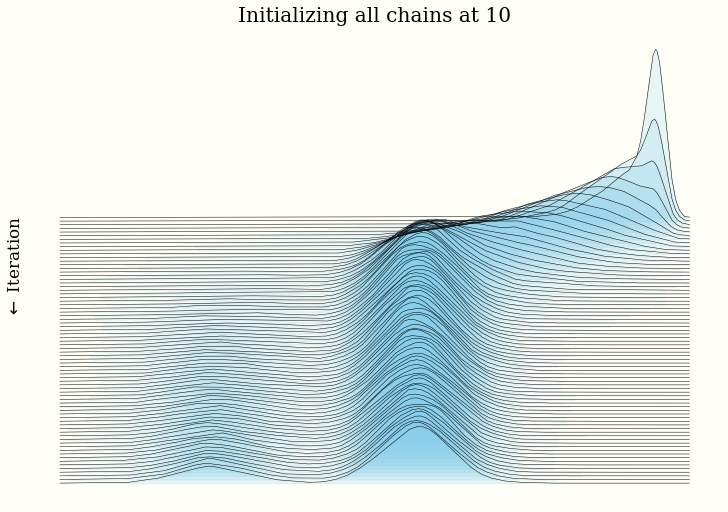

In [11]:
fig, ax = plot_bias(data)
ax.set_title("Initializing all chains at 10")
fig.savefig(image_dir / 'init_10.png', transparent=True)

In [12]:
np.random.seed(0)
data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=1.5,
        init_x=3 + np.random.randn(chains, 1) * 3,
        init_y=0,
        lag=50, 
        iters=75, 
        chains=chains)

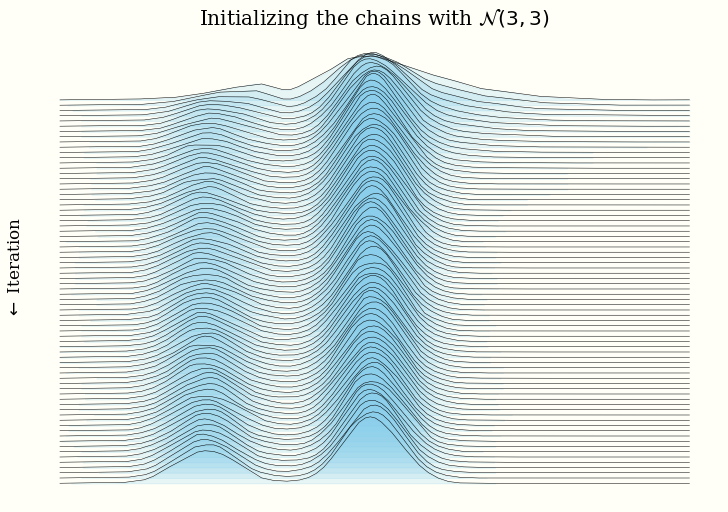

In [13]:
fig, ax = plot_bias(data)
ax.set_title("Initializing the chains with $\mathcal{N}(3, 3)$")

fig.savefig(image_dir / 'init_n33.png', transparent=True)

In [14]:
np.random.seed(0)
data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=0.5,
        init_x=1,
        init_y=0,
        lag=50, 
        iters=75, 
        chains=chains)

In [15]:
np.random.seed(0)

data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=.1,
        init_x=1,
        init_y=10,
        lag=50, 
        iters=75, 
        chains=chains)

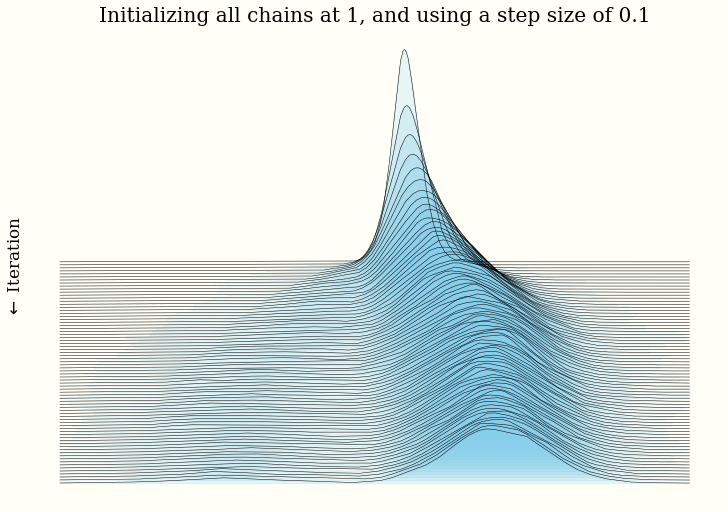

In [16]:
fig, ax = plot_bias(data)
ax.set_title("Initializing all chains at 1, and using a step size of 0.1")
fig.savefig(image_dir / 'init_1_small_cov.png', transparent=True)

In [17]:
np.random.seed(0)

data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=.1,
        init_x=(np.random.randint(0, 3, (chains, 1)) -1) * 6,
        init_y=10,
        lag=0, 
        iters=60, 
        chains=chains)

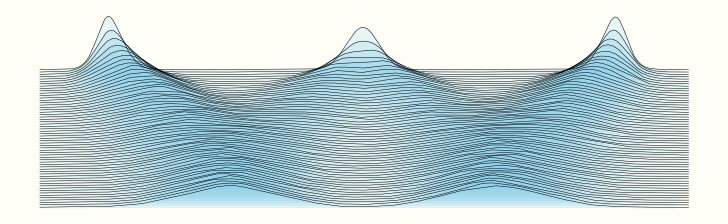

In [18]:
fig, ax = plot_bias(data)
fig.set_figheight(3)
ax.set_title("")
ax.set_ylabel("")
fig.savefig(image_dir / 'header_bias.png', transparent=True)